<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/FRANK/d10_FRANK_PenaltyOne_maio_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

In [3]:
def AvaliaX(X):
  nrow,ncol=X.shape
  fitness = np.asarray([Fun(ind) for ind in X])
  best_idx = np.argmin(fitness)
  best = X[best_idx]
  fobj_best = fitness[best_idx]
  y=fitness
  BEST=best
  FOBEST=fobj_best
  XY= np.c_[X,y] #concatena x e y em 2 colunas            
  XYsorted = XY[XY[:,-1].argsort()] #Ordena a partir da last col(Y) for all row
  x=XYsorted[:,0:ncol]
  XY=XYsorted
  BEST_XY =np.append(BEST,FOBEST)
  return XY,BEST_XY,BEST,FOBEST

In [4]:
!git clone https://github.com/ucfilho/optim_raianars_Insight #clonar do Github
%cd optim_raianars_Insight

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 20.86 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight


In [5]:
import Go2Ann

In [6]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/ANN_read_matrix


In [7]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [8]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [9]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [10]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [11]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [12]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 20.86 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight


In [13]:
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.
/content/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight/Raianars_Routines


In [14]:
############################### Função
import FunctionsNew
#'''  
############################### Função
dim=10 # 
fchoice='PenaltyOne'
Fun=FunctionsNew.PenaltyOne
MAX=np.repeat(50,dim)
MIN=np.repeat(-50,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [15]:
############################### Importar bibliotecas e iniciar a contagem do tempo
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize

############################### Função

#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [16]:
def GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL):
  global fields, Go2Ann, Fc
  global syn0_F,syn1_F,X_max_F,X_min_F
  global syn0_CR,syn1_CR,X_max_CR,X_min_CR
  nrow,ncol=X.shape
  FOBESTm=1e99
  Fo=MAT_INDo[0,6]    # VALOR Fo   
  CRo=MAT_INDo[0,7]   # VALOR CRo
  QUANT=17 # quantos indices esta fazendo
  MAT_IND=np.zeros((1,QUANT))

  REF=0.1 # REFERENCIA DE DIFERENCAS ENTRE OS ELEMENTOS
  
  XY,BEST_XY,BEST,FOBEST=AvaliaX(X)
  soma=0
  for j in range(ncol):
    for i in range(nrow):
        Xj=np.mean(X[:,j])
        soma=soma+(X[i,j]-Xj)**2
  DI=(soma/nrow)**0.5
  DIr=DI/DIo
  MAT_IND[0,0]=DI #dispersao
  MAT_IND[0,1]=DIr # dispersao relativa
  MAT_IND[0,2]=SOMA/TOTAL # fracao relativa

  V1=FOBESTo
  V2=FOBEST
  A=2*V2
  if(V1 > A):
    MAT_IND[0,3]=2 # o valor de fobj torna pelo menos duas vezes melhor
  elif (V2==V1):
    MAT_IND[0,3]=0 # o valor de fobj nao altera
  else:
    MAT_IND[0,3]=1 # o valor de fobj melhora mas menos que duas vezes
  
  # MAT_IND[0,4]  # VELOC X
  DELTA=np.amax(abs(BEST-BESTo))
  if( DELTA >REF):
    MAT_IND[0,4]=2 # difere  for i in range(1,len(PARTIC)):
  elif ( DELTA == 0):
    MAT_IND[0,4]=0 # sem diferenca entre as posicoes do xbest entre duas buscas
  else:
    MAT_IND[0,4]=1 # diferenca entre as posicoes  do xbest menor que ref
  
  MAT_IND[0,5]=nrow  # VALOR NP
  nrow,ncol=XY.shape
  MAT_IND[0,8]=XY[0,(ncol-1)] # VALOR fmin
  MAT_IND[0,9]=XY[(nrow-1),(ncol-1)] # VALOR fmax
  # MAT_IND[0,10] # Valor AD_fmin 
  if abs(MAT_IND[0,8]/MAT_IND[0,8])>1:
    MAT_IND[0,10]=1/abs(MAT_IND[0,8])
  else:
    MAT_IND[0,10]=MAT_IND[0,8]/MAT_IND[0,8]
  # MAT_IND[0,11] # Valor AD_fmax
  if abs(MAT_IND[0,9]/MAT_IND[0,9])>1: # tem que pegar primeira
    MAT_IND[0,11]=1/abs(MAT_IND[0,9]) # tem que pegar primeira
  else:
    MAT_IND[0,11]=MAT_IND[0,9]/MAT_IND[0,9] # tem que pegar do anterior

  # MAT_IND[0,12] # DELTA Fobj
  MAT_IND[0,12]=MAT_IND[0,3]-MAT_IND[0,3]  # tem que pegar do anterior
  

  # MAT_IND[0,13] # DELTA Vx
  MAT_IND[0,13]=MAT_IND[0,4]-MAT_IND[0,4]  # tem que pegar do anterior

  # MAT_IND[0,14] # r_fitness
  Fmin=0.05
  if (MAT_IND[0,8]==0):
    MAT_IND[0,14]=Fmin
  elif (MAT_IND[0,9]==0):
    MAT_IND[0,14]=Fmin
  else:
    if abs(MAT_IND[0,9]/MAT_IND[0,8])<1:
      MAT_IND[0,14]=1-abs(MAT_IND[0,9]/MAT_IND[0,8])
    else:
      MAT_IND[0,14]=1-abs(MAT_IND[0,8]/MAT_IND[0,9])

  MAT_IND[0,6]=Fo
  MAT_IND[0,7]=CRo

  # comecando a rede!!!
  #['DI RELATIVO', 'FRAC Its', 'Fo', 'CRo'] VALORES A USAR
  #MAT_IND[0,1]=DIr # dispersao relativa
  #MAT_IND[0,2]=SOMA/TOTAL # fracao relativa
  #MAT_IND[0,6]=Fo
  #MAT_IND[0,7]=CRo
  
  x_train=MAT_INDo[0,[1,2,6,7]]
  x_train=pd.DataFrame(x_train).T

  nrow,ncol=ANN_F.shape
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  #print(x_train);
  #print(y_calc);
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)

  Fd=DIr
  CRa=np.copy(CRo)
  Fa=np.copy(Fo)

  if(y_cod_F>0):
    Fo=Fo*(1+Fd) #Fo=Fo+Fc
    Fo=(3*Fo+Fa)/4 # para suavizar
    if(Fo<Fa):
      Fo=Fa+0.05
    if(Fo<Fa): # conferir a necessidade de melhorar 
      Fo=Fa+0.05
  else:
    Fo=Fo*(1-Fd) #Fo=Fo-Fc
  
  if(y_cod_CR>0):
    CRo=CRo*(1+Fd) #CRo=CRo+Fc
    CRo=(3*CRo+CRa)/4 # para suavizar
    if(CRo<CRa):  # conferir a necessidade de melhorar 
      CRo=CRa+0.05
  else:
    CRo=CRo*(1-Fd);#CRo=CRo-Fc
  
  if(CRo<Fc):
    CRo=(CRo+CRa)/2 # conferir a necessidade de melhorar
  if(CRo> 1):
    CRo=1

  if(Fo<Fc):
    Fo=(Fa+Fo)/2  # conferir a necessidade de melhorar
  if(Fo> 1):
    Fo=1
  
  CRo=(2*CRo+CRa)/3 # para suavizar
  
  MAT_IND[0,15]=Fo # valor de F que sai da rede
  MAT_IND[0,16]=CRo # valor de CR que sai da rede
  #print(confusion_matrix(y_quali,y_obs_test))
  
  return MAT_IND



In [17]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [18]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS


  DIo=1e99
  
  CRo=crossp;Fo=mut;
  #Xo=np.copy(X)
  XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X)
  nrow,ncol=X.shape

  QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
  MAT_INDo[0,5]=nrow  # VALOR NP
  MAT_INDo[0,6]=Fo    # VALOR Fo   
  MAT_INDo[0,7]=CRo   # VALOR CRo
  
  MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
  
  DIo=np.copy(MAT_INDo[0,0])
  pd.set_option('display.max_columns', 30)  
  MAT_INDo[0,15]=Fo    # VALOR Fo   
  MAT_INDo[0,16]=CRo   # VALOR CRo
  MAT=[]
  for loop in range(ITE):
    X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,
                                                      its,Fun,X,SOMA,TOTAL)
    
    MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
    
    BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
    MAT.append(MAT_IND.ravel())
    
    MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
    MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
    
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
df  = pd.DataFrame(MAT, columns=NOMES)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)


Text(0.5, 1.0, 'PenaltyOne_Diversidade_D=10')

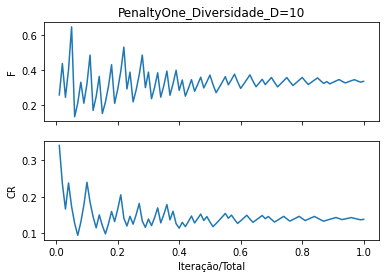

In [19]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)

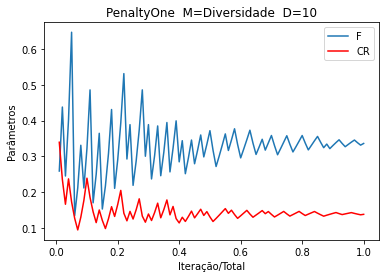

In [20]:
fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()

Text(0, 0.5, 'CR')

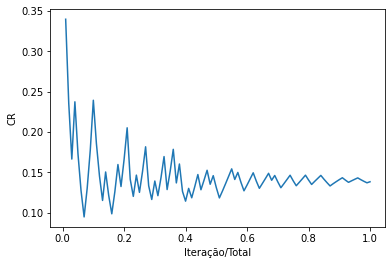

In [21]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

In [22]:
F=list(df['F'])
CR=list(df['CR'])
PARTIC=F+CR
#print(PARTIC)
#print(len(PARTIC))

In [23]:
m=10 # Multiplicador do número de avaliações FO
NPAR=m*dim
ITE=int((len(PARTIC))/2) # PONTOS quantas vezes vai alteral NPAR
its=int(100/ITE) # quantas vezes vai usar o NPAR antes de alterar de novo
TOTAL=m*dim*its*ITE # Avaliações FO

In [24]:
NMAX=900 # maximo tamanho gerar populacao

start_time = time.time()
BEST_AGENTS=[]

for i in range(RUNS):  
    SOMA=0
    pop = np.random.rand(NMAX, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
   
    ind_crossp=ITE-1
    for k in range(ITE):
      ind_crossp=ind_crossp+1
      mut=np.copy(PARTIC[ITE])
      crossp=np.copy(PARTIC[ind_crossp])
      #print(crossp)
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp, NPAR, its,Fun,X,SOMA,TOTAL)
     
    BEST_AGENTS.append(BEST_XY)
    print('k=',i,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 0.0709167202313741 FO= 0.003101651424968032
k= 1 time= 0.14067855676015217 FO= 0.0018122471497511341
k= 2 time= 0.21036187012990315 FO= 0.0020641216942944383
k= 3 time= 0.27967896858851116 FO= 0.0046400086985313735
k= 4 time= 0.3506720225016276 FO= 0.0021088191405235785
k= 5 time= 0.42097341219584145 FO= 0.005347781986967572
k= 6 time= 0.4906719843546549 FO= 0.0016482370664658442
k= 7 time= 0.5606250762939453 FO= 0.005780697582467816
k= 8 time= 0.6309505025545756 FO= 0.0066863188364271655
k= 9 time= 0.7015467127164204 FO= 0.00327369579298987
k= 10 time= 0.7714306712150574 FO= 0.0037596560838746886
k= 11 time= 0.8412242849667867 FO= 0.0022607946899508504
k= 12 time= 0.9109495600064595 FO= 0.0052981187001746215
k= 13 time= 0.9802658001581828 FO= 0.00912014675246702
k= 14 time= 1.0501696983973186 FO= 0.0027033490737974485
k= 15 time= 1.1194782972335815 FO= 0.003351209603143687
k= 16 time= 1.1887874881426492 FO= 0.005151963351655308
k= 17 time= 1.2587010900179545 FO= 0.004358054

In [25]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)

DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -50 / 50 _ PenaltyOne
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  0.0038177182683041193
MIN __: 0.0008304003810893059
MAX__:  0.009399286930523576
STD __: 0.001974765737071928
Tempo Médio= 4.189 segundos ---
50 Rodadas

BEST:  [-9.93292206e-01 -1.03385561e+00 -9.80547523e-01 -8.85182337e-01
 -1.05156424e+00 -1.10198076e+00 -9.10142577e-01 -9.95086052e-01
 -1.02633697e+00 -1.01754086e+00  8.30400381e-04]
